# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Loading preprocessed data

In [2]:
X_train = pd.read_csv('../data/X_train.csv').values
X_test = pd.read_csv('../data/X_test.csv').values
y_train = pd.read_csv('../data/y_train.csv').values.ravel()  # ravel() converts it to a 1D array
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

In [3]:
print(X_train)

[[ 1.    0.    0.   ...  2.38  0.    0.41]
 [ 0.    0.    1.   ...  0.38 -0.01 -0.61]
 [ 0.    0.    1.   ...  0.38 -0.    0.01]
 ...
 [ 1.    0.    0.   ...  1.38  0.   -2.02]
 [ 1.    0.    0.   ...  1.38 -0.01  0.41]
 [ 0.    1.    0.   ...  3.38  0.    0.39]]


In [4]:
print(X_test)

[[ 1.    0.    0.   ... -0.62 -0.01  0.17]
 [ 0.    0.    1.   ...  1.38 -0.   -0.01]
 [ 1.    0.    0.   ...  0.38 -0.    0.39]
 ...
 [ 0.    0.    1.   ... -1.62 -0.01 -0.61]
 [ 1.    0.    0.   ... -0.62 -0.01  0.25]
 [ 0.    0.    1.   ...  0.38 -0.01  0.41]]


In [5]:
print(y_train)

[1118600.  620000. 2932800. ... 1350000.  664224. 1100000.]


In [6]:
print(y_test)

[ 410000. 1175000. 1021875. ...  368000.  640000.  639000.]


# Linear Regression

In [7]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

# Cross-validation for Linear Regression

In [8]:
cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores for Linear Regression: {cv_scores}')

Cross-Validation Scores for Linear Regression: [-5.01603708e+14 -2.07919957e+11 -2.29114241e+11 -2.52838778e+11
 -1.88609050e+11]


# Predictions on test set

In [11]:
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

# Evaluate Linear Regression

In [12]:
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
print(f'Linear Regression Mean Squared Error on Test Set: {mse_linear_reg}')
print(f'Linear Regression R2 Score on Test Set: {r2_linear_reg}')

Linear Regression Mean Squared Error on Test Set: 192873940913.38925
Linear Regression R2 Score on Test Set: 0.2552406168844492


# Plotting Loss Curve for Linear Regression

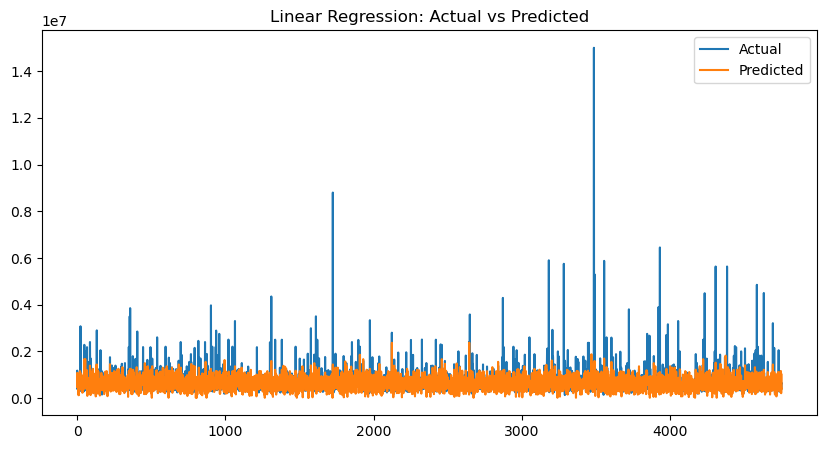

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_linear_reg, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Scatter Plot for Linear Regression

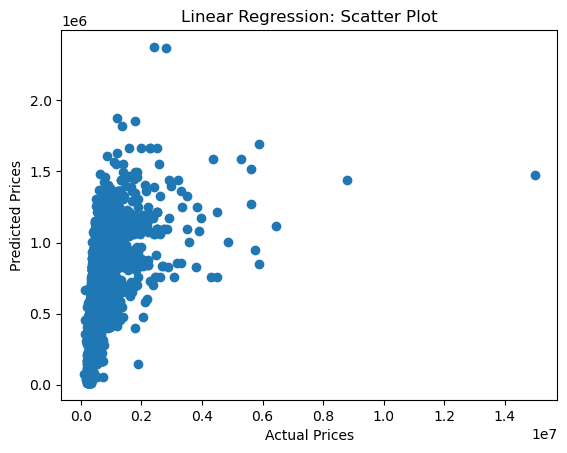

In [16]:
plt.scatter(y_test, y_pred_linear_reg)
plt.title('Linear Regression: Scatter Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()